# Importing Necessary Libraries

In this starting section of our code we will be mentioning every python builtin libraries we have used for our model

In [1]:
# Importing pandas for data manipulation
import pandas as pd
# Importing numpy for numerical computations
import numpy as np
# Importing train_test_split function from sklearn
from sklearn.model_selection import train_test_split as tts
# Importing confusion_matrix function from sklearn
from sklearn.metrics import confusion_matrix
# Importing PCA class from sklearn
from sklearn.decomposition import PCA
# Importing matplotlib for plotting
import matplotlib.pyplot as plt
# Importing seaborn for visualization
import seaborn as sns

# Loading Our Dataset

In this section of our code we will be reading our dataset into pandas dataframe using pandas

In [2]:
# Reading the heart_Disease.csv file into a pandas dataframe
df = pd.read_csv("data.csv")
# Displaying 10 random rows from the dataframe
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


# Data Understanding, Cleaning and Transformation

In [3]:
# Finding the number of rows and columns in the dataframe
rows, cols = df.shape
# Printing the number of rows
print(f"Rows : {rows}")
# Printing the number of columns
print(f"Columns : {cols}")

Rows : 303
Columns : 14


This dataset contains information about diagnoses of heart disease patients in which the target column determines whether a patient has a heart disease or not. 

In [4]:
# Getting information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the above code we can see that we have 0 null values in our dataset.

# Data Analysis

In [5]:
# Counting the number of occurrences of each unique value in the "target" column
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

The result of running the code shows that there are 165 instances with the class label 1 and 138 instances with the class label 0. which means that our data is somewhat balanced.

In [6]:
# Selecting all the numerical columns "age", "trestbps", "chol", "thalach", and "oldpeak" from the dataframe
df_selected = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
# Getting descriptive statistics for the selected columns
df_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


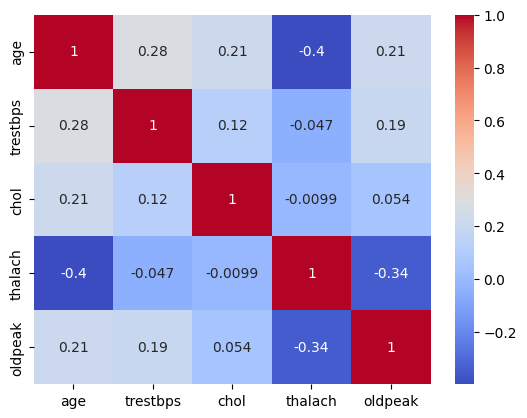

In [7]:
# Calculate the correlation matrix for every numerical column of the DataFrame 'df'
corr = df[["age", "trestbps", "chol", "thalach", "oldpeak"]].corr()
# Plot a heatmap of the correlation matrix with annotations and the 'coolwarm' color map
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

# Data Visualisation

Target based on sex

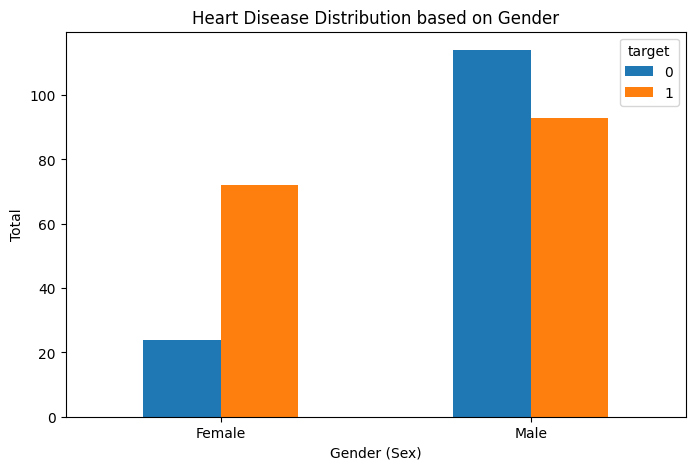

In [8]:
# Creating labels for gender (0: Female, 1: Male)
label_gender = [0, 1]
# Creating labels for gender (Female, Male)
label_gender2 = ['Female', 'Male']
# Plotting a bar chart to show the distribution of heart disease based on gender
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5))
# Adding a title to the plot
plt.title('Heart Disease Distribution based on Gender')
# Adding a label to the x-axis
plt.xlabel('Gender (Sex)')
# Adding a label to the y-axis
plt.ylabel('Total')
# Setting the x-tick labels
plt.xticks(label_gender, label_gender2, rotation=0)
# Displaying the plot
plt.show()

Target based on Chest Pain Type

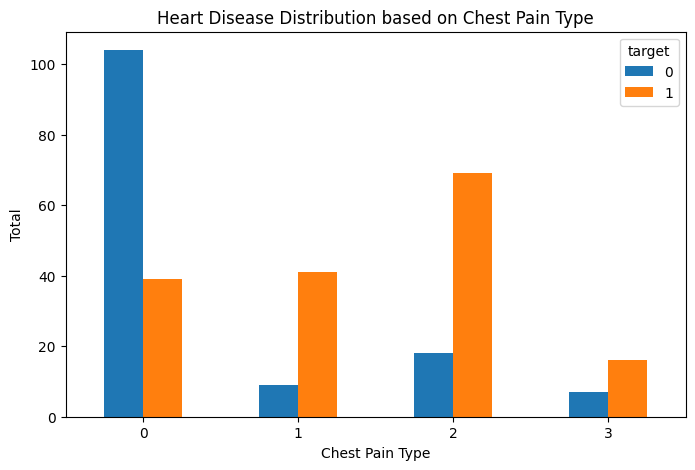

In [9]:
# Plotting a bar chart to show the distribution of heart disease based on chest pain type
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(8, 5))
# Adding a title to the plot
plt.title('Heart Disease Distribution based on Chest Pain Type')
# Adding a label to the x-axis
plt.xlabel('Chest Pain Type')
# Adding a label to the y-axis
plt.ylabel('Total')
# Setting the x-tick labels to be horizontal
plt.xticks(rotation=0)
# Displaying the plot
plt.show()

Target based on fbs (Fasting Blood Sugar)

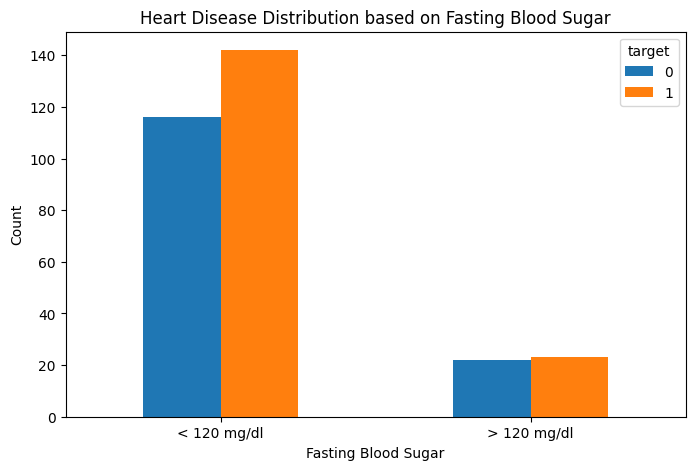

In [10]:
# Creating labels for fasting blood sugar (0: < 120 mg/dl, 1: > 120 mg/dl)
label_fbs = [0, 1]
# Creating labels for fasting blood sugar (< 120 mg/dl, > 120 mg/dl)
label_fbs2 = ['< 120 mg/dl', '> 120 mg/dl']
# Plotting a bar chart to show the distribution of heart disease based on fasting blood sugar
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(8, 5))
# Adding a title to the plot
plt.title('Heart Disease Distribution based on Fasting Blood Sugar')
# Adding a label to the x-axis
plt.xlabel('Fasting Blood Sugar')
# Adding a label to the y-axis
plt.ylabel('Count')
# Setting the x-tick labels
plt.xticks(label_fbs, label_fbs2, rotation=0)
# Displaying the plot
plt.show()

Target based on restecg (resting electrocardiographic results)

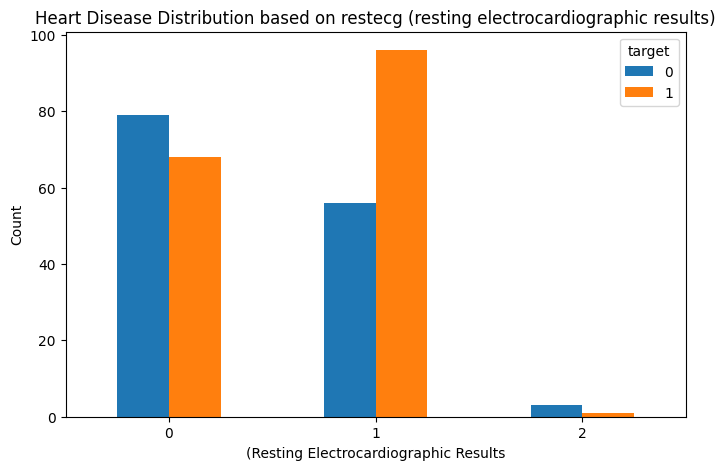

In [11]:
# Plotting a bar chart to show the distribution of heart disease based on resting electrocardiographic results
pd.crosstab(df.restecg, df.target).plot(kind='bar', figsize=(8, 5))
# Adding a title to the plot
plt.title('Heart Disease Distribution based on restecg (resting electrocardiographic results)')
# Adding a label to the x-axis
plt.xlabel('(Resting Electrocardiographic Results')
# Adding a label to the y-axis
plt.ylabel('Count')
# Setting the x-tick labels to be horizontal
plt.xticks(rotation=0)
# Displaying the plot
plt.show()

Target based on exang (exercise induced angina)

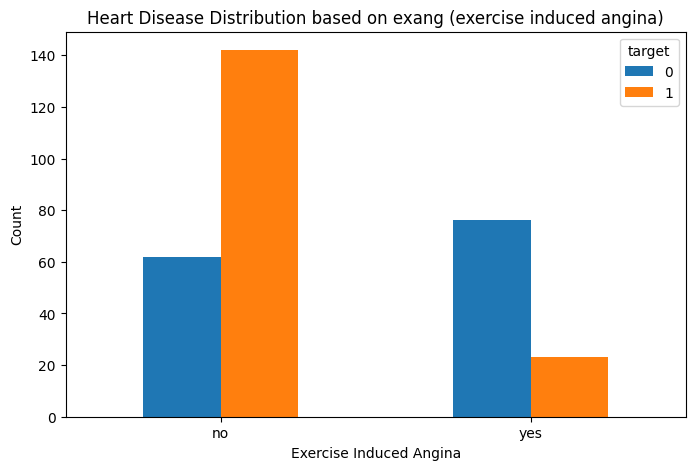

In [12]:
# Plotting a bar chart to show the distribution of heart disease based on exercise induced angina
pd.crosstab(df.exang, df.target).plot(kind='bar', figsize=(8, 5))
# Adding a title to the plot
plt.title('Heart Disease Distribution based on exang (exercise induced angina)')
# Adding a label to the x-axis
plt.xlabel('Exercise Induced Angina')
# Adding a label to the y-axis
plt.ylabel('Count')
# Setting the x-tick labels
label_exang = [0,1]
label_exang2 = ["no", "yes"]
plt.xticks(label_exang, label_exang2, rotation=0)
# Displaying the plot
plt.show()

Target based on slope (slope of the peak exercise ST segment)

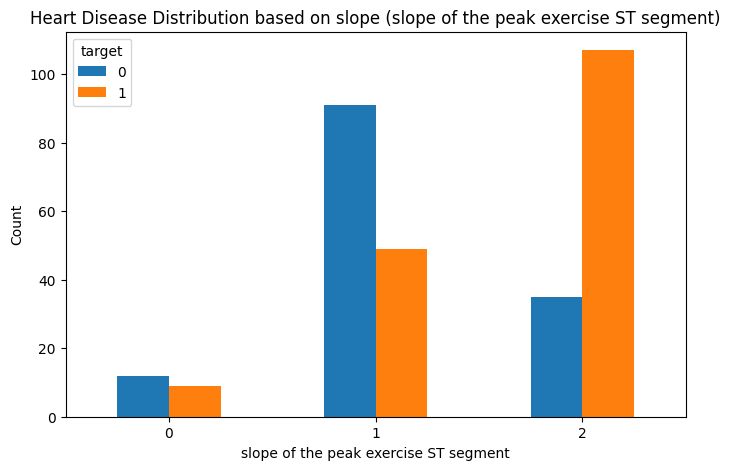

In [13]:
# Plotting a bar chart to show the distribution of heart disease based on slope
pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(8, 5))
# Adding a title to the plot
plt.title('Heart Disease Distribution based on slope (slope of the peak exercise ST segment)')
# Adding a label to the x-axis
plt.xlabel('slope of the peak exercise ST segment')
# Adding a label to the y-axis
plt.ylabel('Count')
# Setting the x-tick rotation as 0
plt.xticks(rotation=0)
plt.show()

Target based on on number of major vessels (0-4) colored by flourosopy

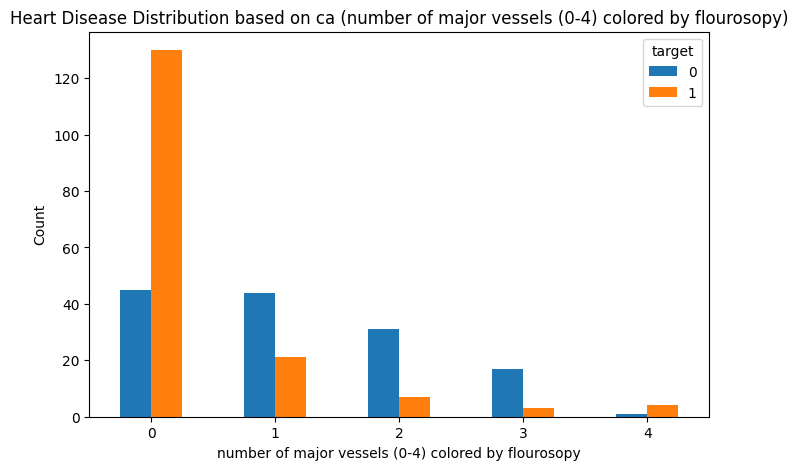

In [14]:
# Plotting a bar chart to show the distribution of heart disease based on number of major vessels (0-4) colored by flourosopy
pd.crosstab(df.ca, df.target).plot(kind='bar', figsize=(8, 5))
# Adding a title to the plot
plt.title('Heart Disease Distribution based on ca (number of major vessels (0-4) colored by flourosopy)')
# Adding a label to the x-axis
plt.xlabel('number of major vessels (0-4) colored by flourosopy')
# Adding a label to the y-axis
plt.ylabel('Count')
# Setting the x-tick labels to be horizontal
plt.xticks(rotation=0)
# Show the plot
plt.show()

Target based on Thallium

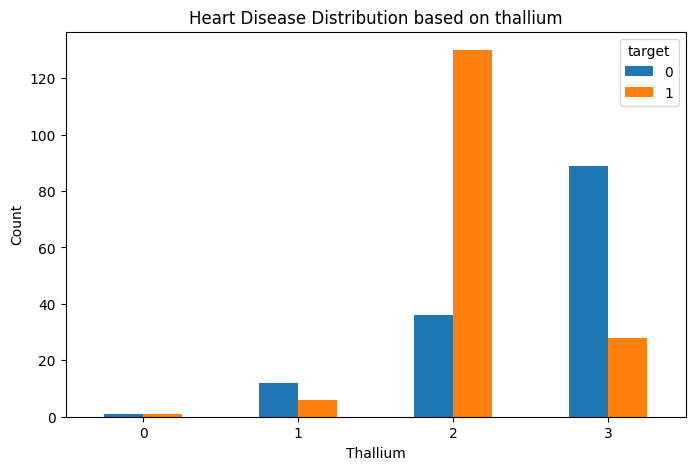

In [15]:
# Plotting a bar chart to show the distribution of heart disease based on Thallium
pd.crosstab(df.thal, df.target).plot(kind='bar', figsize=(8, 5))
# Set plot title and labels
plt.title('Heart Disease Distribution based on thallium')
# Adding a label to the x-axis
plt.xlabel('Thallium')
# Adding a label to the y-axis
plt.ylabel('Count')
# Setting the x-tick labels to be horizontal
plt.xticks(rotation=0)
# Show the plot
plt.show()

# Splitting Our Dataset into Training and Testing set

In this section of our code, first we will be scaling our features by standardizing our feature data and after scaling the data we will use the train_test_split method to split our data into training and testing set. We do this to evaluate our model using unseen data

Defining a function to scale our features

In [16]:
def standard_scaler(X):
    # Calculate the mean of the input array, X, along the columns (axis=0)
    mean = np.mean(X, axis=0)
    # Calculate the standard deviation of the input array, X, along the columns (axis=0)
    scale = np.std(X, axis=0)
    # Scale the input array by subtracting the mean and dividing by the standard deviation
    X_scaled = (X - mean) / scale
    # Return the scaled array
    return X_scaled

In [17]:
# Drop the "target" column from the DataFrame "df"
scaled_features = df.drop(columns="target")
# Scale the features using the "standard_scaler" function
scaled_features = standard_scaler(scaled_features)
# Create a new DataFrame "scaled_df" using the scaled features
scaled_df = pd.DataFrame(data=scaled_features, columns=scaled_features.columns)
# Add the "target" column back to the scaled DataFrame
scaled_df["target"] = df["target"]
# Displaying the scaled DataFrame
scaled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


In [18]:
# Split the scaled_df dataframe into two separate variables: Train and Test
Train, Test = tts(scaled_df, train_size = 0.7, random_state = 5)

Preparing the training data for our machine learning model. The variables Xtrain and Ytrain are assigned as features and target columns, respectively. 

In [19]:
Xtrain = Train[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]
Ytrain = Train.target
print(f"Xtrain size : {Xtrain.shape}")
print(f"Ytrain size : {Ytrain.shape}")

Xtrain size : (212, 13)
Ytrain size : (212,)


Preparing the testing data for our machine learning model. The variables Xtest and Ytest are assigned as features and target columns, respectively.

In [20]:
Xtest = Test[["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]
Ytest = Test.target
print(f"Xtest size : {Xtest.shape}")
print(f"Ytest size : {Ytest.shape}")

Xtest size : (91, 13)
Ytest size : (91,)


# Building Primary Model[Logistic Regression]:

In this section, we will finally build our model using the identified features and target from our training set using Logistic Regression from scratch.

In [21]:
m, n = Xtrain.shape # m : number of rows, n : number of features
initial_weights = np.zeros(n) # initializing an array of size as 0s
initial_bias = 0 # initializing bias as 0

Defining a sigmoid_function() that takes three arguments: x, w, and b. The x argument is a matrix of feature values, with each row representing a sample and each column representing a feature. The w argument is a vector of weights that corresponds to the features in x. The b argument is a scalar bias term. The function calculates the dot product of x and w, adds the bias b, and then calculates the sigmoid function of this result and returns it. 

In [22]:
def sigmoid_function(x, w, b):
    z = x.dot(w) + b
    return np.where(1/(1 + np.exp(-z))>0.5, 1, 0)

Defining a function Log_Loss() taht calculates and returns the logistic loss or binary cross-entropy loss of a logistic regression model with given features(x), target(y), weights(w), and bias(b). 

In [23]:
def Log_Loss(x,y,w,b):
    ypred = sigmoid_function(x,w,b)
    epsilon = 1e-15
    loss = -np.mean(y * np.log(ypred + epsilon) + (1 - y) * np.log(1 - ypred + epsilon))
    return loss

Calculating and printing the logistic loss for our logistic regression model with the initial weights and bias, which are both set to zero. The Log_Loss function is called with the feature matrix Xtrain, the target vector Ytrain, the initial weights and the initial bias as arguments. The result of the function, which represents the initial logistic loss, is stored in the variable initial_loss and printed.

In [24]:
initial_loss = Log_Loss(Xtrain, Ytrain, initial_weights, initial_bias)
print(f"Initial_Log_Loss : {initial_loss}")

Initial_Log_Loss : 19.061494519832785


Defining a class "Logistic_Regression" that implements logistic regression algorithm for binary classification.

In [25]:
class Logistic_Regression:
    
    # Initialize the model with learning rate (alpha) and number of iterations
    def __init__(self, alpha = 0.001, iterations = 10000):
        self.alpha = alpha # learning rate
        self.iterations = iterations # number of iterations
        
    # Fit the model to training data
    def fit(self, X,Y):
        self.X = X # feature matrix
        self.Y = Y # target vector
        self.m, self.n = X.shape # number of samples, number of features
        self.w = np.zeros(self.n) # initial weights
        self.b = 0 # initial bias
        # update the weights and bias for the specified number of iterations
        for i in range(self.iterations):
            self.update_parameters()
        return self.w, self.b
              
    # Update the parameters (weights and bias) based on the gradient
    def update_parameters(self):
        # Calculate predicted target values
        Y_pred = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))
        # Update the weights using gradient descent
        dw = np.dot(self.X.T, (Y_pred - self.Y))/self.m
        self.w = self.w - self.alpha * dw
        # Update the bias using gradient descent
        db = np.sum(Y_pred - self.Y)/self.m
        self.b = self.b - self.alpha * db

    # Predict the target values for a given set of features
    def predict(self, X):
        # Calculate predicted target values
        Y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)))
        # Convert predicted target values to binary classification
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        return Y_pred


creating an object of class Logistic_Regression and naming it model

In [26]:
model = Logistic_Regression()

The "fit" method is used to fit our Logistic regression model to the training data, represented by "Xtrain" and "Ytrain". The method returns two values, "updated_weights" and "updated_bias", which are the updated values for the model's weights and bias, respectively. 

In [27]:
updated_weights, updated_bias = model.fit(Xtrain, Ytrain)
print(f"updated_weights : {updated_weights}")
print(f"updated_bias : {updated_bias}")

updated_weights : [-0.08106075 -0.52754907  0.52733677 -0.19517291 -0.15788867  0.05608092
  0.26807148  0.42988105 -0.45499017 -0.37440588  0.22782795 -0.52615111
 -0.47835107]
updated_bias : 0.10018755933127348


The cost is computed using the Log_Loss() which takes in four parameters - Xtrain, Ytrain, updated_weights and updated_bias. The function returns the log loss of the model with the given updated parameters. The computed loss is then printed with our initial loss for comparison

In [28]:
optimized_loss = Log_Loss(Xtrain, Ytrain, updated_weights, updated_bias)
print(f"Initial_Log_Loss : {initial_loss}")
print(f"optimized_Log_Loss : {optimized_loss}")

Initial_Log_Loss : 19.061494519832785
optimized_Log_Loss : 6.679669019770461


# Model Evaluation

Accuracy Score

Defining function that calculates the accuracy of our classification model by taking in the values of True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN).

In [29]:
def Accuracy(TP, TN, FP, FN):
    return (TP + TN) / (TP + FP + FN + TN)

Precision

Defining function that calculates the precision of our classification model by taking in the values of True Positive (TP) and False Positive (FP).

In [30]:
def Precision(TP, FP):
    return TP / (TP + FP)

Recall 

Defining function that calculates the Recall value of our classification model by taking in the values of True Positive (TP) and False Negative (FN).

In [31]:
def Recall(TP, FN):
    return TP / (TP + FN)

Making predictions using our machine learning model on the test data set.

In [32]:
Y_pred = model.predict(Xtest)

Creating a dataframe to see how our model is predicting by comparing the predicting values with its true values

In [33]:
# Create an empty dataframe to store the comparison results
comp_df = pd.DataFrame()
# Add the predicted target values from the model's prediction on Xtest to the "Predicted" column of the dataframe
comp_df["Predicted"] = Y_pred
# Add the actual target values from Ytest to the "Actual" column of the dataframe
comp_df["Actual"] = np.array(Ytest)

In [34]:
# Display a random sample of 10 rows from the comparison dataframe
comp_df.sample(10)

,Predicted,Actual
61,0,0
15,0,0
24,0,1
31,1,1
65,1,1
12,1,1
27,1,1
52,1,1
7,0,0
55,1,1


In [35]:
cm = confusion_matrix(comp_df["Predicted"], comp_df["Actual"])
cm

array([[38,  3],
       [ 5, 45]], dtype=int64)

In [36]:
True_Positive = cm[0][0]
False_Negative = cm[0][1]
False_Positive = cm[1][0]
True_Negative = cm[1][1]
print(f"True Positive : {True_Positive}")
print(f"False Negative : {False_Negative}")
print(f"False Positive : {False_Positive}")
print(f"True Negative : {True_Negative}")

True Positive : 38
False Negative : 3
False Positive : 5
True Negative : 45


Calling the functions used to evaluate our model and storing it in each different variables

In [37]:
accuracy = Accuracy(True_Positive,True_Negative,False_Positive, False_Negative)
precision = Precision(True_Positive, False_Positive)
recall = Recall(True_Positive, False_Negative)
f1_score = 2 * (precision * recall) / (precision + recall)

Printing out the evaluated scores

In [38]:
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1_Score : {f1_score}")

Accuracy : 0.9120879120879121
Precision : 0.8837209302325582
Recall : 0.926829268292683
F1_Score : 0.9047619047619047


# Dimensionality Reduction (PCA)

In this section we will recreate our model but this time using the reduced features we get by applying PCA to our initial features for dimesionality reduction.

Performing principal component analysis (PCA) on a dataset with scaled features.The PCA object is initialized with n_components=4, which means that the result of the PCA transformation will result in 4 principal components (or reduced dimensions) of the original data. The fit method is applied to the scaled features to fit the PCA model to the data.
Finally, the transformed features are obtained by applying the transform method to the original features (feature_df), and the shape of the reduced features is obtained by calling the shape attribute.

In [39]:
# Creating an instance of PCA with 4 component
pca = PCA(4)
# Fit the scaled data to the PCA model
pca.fit(scaled_df.drop(columns = "target"))
# Transform the scaled data to reduced features using the PCA model
reduced_features = pca.transform(scaled_df.drop(columns = "target"))
# Print the shape of the original and reduced features
print(f"original features shape : {scaled_df.drop(columns = 'target').shape}")
print(f"reduced features shape : {reduced_features.shape}")

original features shape : (303, 13)
reduced features shape : (303, 4)


Creating a new Pandas DataFrame called reduced_df from the reduced_features obtained from the PCA transformation. Also adding a new column called "Target" to the reduced_dataset DataFrame, which contains the values of the "target" column from the original DataFrame (df).

In [40]:
# Create a dataframe from the reduced features
reduced_df = pd.DataFrame(data = reduced_features, columns = ["feature1", "feature2","feature3", "feature4"])
# Add a column for our target to the reduced dataframe
reduced_df["Target"] = np.array(scaled_df["target"])

Displaying information on the reduced dataframe, such as the number of rows and columns, the data types of columns, and memory usage, among others. 

In [41]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  303 non-null    float64
 1   feature2  303 non-null    float64
 2   feature3  303 non-null    float64
 3   feature4  303 non-null    float64
 4   Target    303 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 12.0 KB


Splitting the reduced_df into two Dataframes, Train and Test, using the train_test_split function from the scikit-learn library in Python. The function splits the data into two sets, with train_size argument set to 0.7, meaning 70% of the data will be used for training and the remaining 30% for testing.

In [42]:
train, test = tts(reduced_df, train_size = 0.7, random_state = 5)

Preparing the training data for our machine learning model. The variables x_train and y_train are assigned as features and target columns, respectively.

In [43]:
# Get the "feature" column of the train dataframe
x_train = train[["feature1", "feature2","feature3", "feature4"]]
# Get the "Target" column of the train dataframe
y_train = train.Target
# Print the shapes of the x_train and y_train
print(f"x_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")

x_train shape : (212, 4)
y_train shape : (212,)


Preparing the testing data for our machine learning model. The variables x_train and y_train are assigned as features and target columns, respectively.

In [44]:
# Get the "feature" column of the test dataframe
x_test = test[["feature1", "feature2","feature3", "feature4"]]
# Get the "Target" column of the test dataframe
y_test = test.Target
# Print the shapes of the x_test and y_test
print(f"x_test shape : {x_test.shape}")
print(f"y_test shape : {y_test.shape}")

x_test shape : (91, 4)
y_test shape : (91,)


Creating an object of class Logistic_Regression and naming it model_pca as we are using the reduced version of the dataframe to train our model. Also calling the fit method is used to fit our logistic model to the training data, represented by "x_train" and "y_train". The method returns two values, "updated_w" and "updated_b", which are the updated values for the model's weights and bias, respectively. 

In [45]:
# Create an instance of the Logistic Regression model
model_pca = Logistic_Regression()
# Fit the model using the training data
updated_w, updated_b = model_pca.fit(x_train, y_train)
print(f"updated_weights (pca) : {updated_w})")
print(f"updated_bias (pca) : {updated_b})")

updated_weights (pca) : [-1.13018937  0.3705993  -0.17034495  0.50967846])
updated_bias (pca) : 0.10481550182139268)


Using the predict method of our machine learning model to make predictions on the testing data.

In [46]:
y_pred = model_pca.predict(x_test) # making prediction on test features

Evaluating the performance of our machine learning model on the testing data using confusion matrix.

In [47]:
cm_pca = confusion_matrix(y_pred, y_test)
cm_pca

array([[39,  4],
       [ 4, 44]], dtype=int64)

In [48]:
True_Positive_pca = cm_pca[0][0]
False_Negative_pca = cm_pca[0][1]
False_Positive_pca = cm_pca[1][0]
True_Negative_pca = cm_pca[1][1]
print(f"True Positive : {True_Positive_pca}")
print(f"False Negative : {False_Negative_pca}")
print(f"False Positive : {False_Positive_pca}")
print(f"True Negative : {True_Negative_pca}")

True Positive : 39
False Negative : 4
False Positive : 4
True Negative : 44


Calling the functions used to evaluate our pca model and storing it in each different variables

In [49]:
accuracy_pca = Accuracy(True_Positive_pca,True_Negative_pca,False_Positive_pca, False_Negative_pca)
precision_pca = Precision(True_Positive_pca, False_Positive_pca)
recall_pca = Recall(True_Positive_pca, False_Negative_pca)
f1_score_pca = 2 * (precision_pca * recall_pca) / (precision_pca + recall_pca)

Printing out the evaluated scores

In [50]:
print(f"Accuracy : {accuracy_pca}")
print(f"Precision : {precision_pca}")
print(f"Recall : {recall_pca}")
print(f"F1_Score : {f1_score_pca}")

Accuracy : 0.9120879120879121
Precision : 0.9069767441860465
Recall : 0.9069767441860465
F1_Score : 0.9069767441860465


# Conclusion

In this section we will summarize the results and findings of our study and analysis in the context of our model based on the the evaluation metrics calculated for the two classification models trained on the reduced and original datafarme.

In [51]:
print(f"Accuracy : {accuracy}")
print(f"Accuracy (pca) : {accuracy_pca}")
print("---------------------------------------------------------------")
print(f"Precision : {precision}")
print(f"Precision (pca): {precision_pca}")
print("---------------------------------------------------------------")
print(f"Recall : {recall}")
print(f"Recall (pca): {recall_pca}")
print("---------------------------------------------------------------")
print(f"F1_Score : {f1_score}")
print(f"F1_Score (pca): {f1_score_pca}")

Accuracy : 0.9120879120879121
Accuracy (pca) : 0.9120879120879121
---------------------------------------------------------------
Precision : 0.8837209302325582
Precision (pca): 0.9069767441860465
---------------------------------------------------------------
Recall : 0.926829268292683
Recall (pca): 0.9069767441860465
---------------------------------------------------------------
F1_Score : 0.9047619047619047
F1_Score (pca): 0.9069767441860465


From above displayed scores we can see that using PCA to reduce the data dimensionality before training the model did not significantly impact the performance of the model build on original dataset.

The accuracy is the same for both models, with a value of 0.912. This means that the models correctly predicted the outcome 91.2% of the time.
Precision improved slightly from 0.8837 to 0.9069 when PCA was used, but this difference is not very significant.
Recall decreased slightly from 0.9268to 0.90697 when PCA was used, but this difference is not very significant.
F1 score is also the same for both models, with a value of 0.9047, which indicates that the models have balanced performance.
Overall, it appears that using PCA did not have a major impact on the model's performance in this case. The results from both models are similar and indicate good performance.